# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [8]:
import urllib.request
import os
import zipfile

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir

download_data()

Download complete
Extracting data files...
Data extracted


'./data'

In [10]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv('data/airbnb_NYC.csv', encoding='latin-1')

print("Original Price variable (first 20 rows):")
print(airbnb['Price'].head(20))
print(f"\nData type: {airbnb['Price'].dtype}")

def clean_price(price):
    if pd.isna(price):
        return np.nan
    price_str = str(price).strip()
    price_clean = price_str.replace('$', '').replace(',', '')
    try:
        return float(price_clean)
    except ValueError:
        return np.nan

airbnb['Price_clean'] = airbnb['Price'].apply(clean_price)

missing_count = airbnb['Price_clean'].isna().sum()
print(f"\nNumber of missing values after cleaning: {missing_count}")
print(f"Percentage missing: {(missing_count / len(airbnb)) * 100:.2f}%")
print(f"\nCleaned Price statistics:")
print(airbnb['Price_clean'].describe())

Original Price variable (first 20 rows):
0     145
1      37
2      28
3     199
4     549
5     149
6     250
7      90
8     270
9     290
10    170
11     59
12     49
13     68
14    285
15     75
16    145
17    100
18    150
19    700
Name: Price, dtype: object

Data type: object

Number of missing values after cleaning: 0
Percentage missing: 0.00%

Cleaned Price statistics:
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price_clean, dtype: float64


In [11]:
import pandas as pd
import numpy as np

police = pd.read_csv('data/mn_police_use_of_force.csv', encoding='latin-1')

print("Original subject_injury variable:")
print(police['subject_injury'].value_counts(dropna=False))

total_rows = len(police)
missing_count_injury = police['subject_injury'].isna().sum()
prop_missing = missing_count_injury / total_rows

print(f"\nProportion of missing values: {prop_missing:.4f} ({prop_missing*100:.2f}%)")

police['subject_injury_clean'] = police['subject_injury'].copy()
police['subject_injury_clean'] = police['subject_injury_clean'].str.strip().str.title()

print("\nCross-tabulation: subject_injury_clean vs force_type")
crosstab = pd.crosstab(
    police['subject_injury_clean'],
    police['force_type'],
    margins=True,
    dropna=False
)
print(crosstab)

print("\nPercentage missing by force_type:")
missing_by_force = police.groupby('force_type')['subject_injury_clean'].apply(
    lambda x: (x.isna().sum() / len(x)) * 100
)
print(missing_by_force.sort_values(ascending=False))

police['subject_injury_clean'] = police['subject_injury_clean'].fillna('Missing')

print("\nFinal value counts after filling with 'Missing':")
print(police['subject_injury_clean'].value_counts())

Original subject_injury variable:
subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64

Proportion of missing values: 0.7619 (76.19%)

Cross-tabulation: subject_injury_clean vs force_type
force_type            Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_clean                                                    
No                        0          1093                131        2   
Yes                       2          1286                 41        0   
NaN                       2          7051               1421        0   
All                       4          9430               1593        2   

force_type            Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_clean                                                      
No                                   33                 34            0   
Yes                                  44                 40            0   
NaN                                  27          

In [12]:
import pandas as pd
import numpy as np

metabric = pd.read_csv('data/metabric.csv', encoding='latin-1')

print("Original Overall Survival Status:")
print(metabric['Overall Survival Status'].value_counts(dropna=False))

metabric['survival_dummy'] = metabric['Overall Survival Status'].map({
    'LIVING': 1,
    'DECEASED': 0
})

print("\nDummy variable created:")
print(metabric['survival_dummy'].value_counts(dropna=False))

print("\nCross-check:")
print(pd.crosstab(
    metabric['Overall Survival Status'],
    metabric['survival_dummy'],
    margins=True
))

Original Overall Survival Status:
Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64

Dummy variable created:
survival_dummy
NaN    1343
Name: count, dtype: int64

Cross-check:
Empty DataFrame
Columns: []
Index: []


In [13]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv('data/airbnb_NYC.csv', encoding='latin-1')

missing_reviews = airbnb['Review Scores Rating'].isna().sum()
print(f"Number of missing Review Scores Rating: {missing_reviews}")
print(f"Percentage missing: {(missing_reviews / len(airbnb)) * 100:.2f}%")

median_score = airbnb['Review Scores Rating'].median()
print(f"\nMedian review score (non-missing): {median_score}")

airbnb['Review_Scores_Imputed'] = airbnb['Review Scores Rating'].fillna(median_score)

print(f"\nMissing values after imputation: {airbnb['Review_Scores_Imputed'].isna().sum()}")

print("\nComparison of distributions:")
print("\nOriginal (non-missing only):")
print(airbnb['Review Scores Rating'].describe())
print("\nWith median imputation:")
print(airbnb['Review_Scores_Imputed'].describe())

Number of missing Review Scores Rating: 8323
Percentage missing: 27.31%

Median review score (non-missing): 94.0

Missing values after imputation: 0

Comparison of distributions:

Original (non-missing only):
count    22155.000000
mean        91.993230
std          8.850373
min         20.000000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: Review Scores Rating, dtype: float64

With median imputation:
count    30478.000000
mean        92.541243
std          7.598524
min         20.000000
25%         90.000000
50%         94.000000
75%         97.000000
max        100.000000
Name: Review_Scores_Imputed, dtype: float64


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [17]:
import os
print("Files in current directory:")
print(os.listdir())

print("\nFiles in data directory:")
if os.path.exists('data'):
    print(os.listdir('data'))

Files in current directory:
['.config', 'data', 'data.zip', 'sample_data']

Files in data directory:
['CardiacPatientData.csv', 'VirginiaPretrialData2017Codebook.pdf', 'cars_hw.csv', 'patents.csv', 'energy.csv', 'metabric.csv', 'cars_env.csv', '2022 election cycle fundraising.csv', 'land_mines.csv', 'heart_failure_readme.txt', 'airbnb_hw.csv', 'ForeignGifts_edu.csv', 'brazil_default.csv', 'electricity_data_validation.csv', 'ames_codebook.txt', 'zoo.csv', 'weapons-trade-register.csv', 'college_completion.csv', 'heart_failure_clinical_records_dataset.csv', 'crimebystatecombinedwithunemployment.csv', 'divorce', 'drilling_rigs.csv', 'use_of_force.txt', 'SIPRI Military Expenditure Database.csv', 'craigslist_cville_cars.csv', 'nhanes_data_17_18.csv', 'sharks.csv', 'USA_cars_datasets.csv', 'mn_police_use_of_force.csv', 'iowa.csv', 'airbnb_NYC.csv', 'wages_hw.csv', 'Effectiveness of Bystander Cardiopulmonary Resuscitation and Survival Following Out-of-Hospital Cardiac Arrest.pdf', 'mammogram.c

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sharks = pd.read_csv('data/sharks.csv', encoding='latin-1', low_memory=False)

print(f"Dataset shape: {sharks.shape}")
print(f"\nFirst few rows:")
print(sharks.head())
print(f"\nColumn names:")
print(sharks.columns.tolist())

Dataset shape: (6462, 257)

First few rows:
   index   Case Number                  Date    Year        Type      Country  \
0      0    2020.02.05           05-Feb-2020  2020.0  Unprovoked          USA   
1      1  2020.01.30.R  Reported 30-Jan-2020  2020.0    Provoked      BAHAMAS   
2      2    2020.01.17           17-Jan-2020  2020.0  Unprovoked    AUSTRALIA   
3      3    2020.01.16           16-Jan-2020  2020.0  Unprovoked  NEW ZEALAND   
4      4    2020.01.13           13-Jan-2020  2020.0  Unprovoked          USA   

              Area               Location                  Activity  \
0             Maui                    NaN  Stand-Up Paddle boarding   
1           Exumas                    NaN                  Floating   
2  New South Wales          Windang Beach                   Surfing   
3        Southland            Oreti Beach                   Surfing   
4   North Carolina  Rodanthe, Dare County                   Surfing   

              Name  ... Unnamed: 246 Unnam

In [20]:
print("Columns with all missing values:")
empty_cols = sharks.columns[sharks.isna().all()].tolist()
print(empty_cols)

sharks_clean = sharks.dropna(axis=1, how='all')

print(f"\nOriginal shape: {sharks.shape}")
print(f"After dropping empty columns: {sharks_clean.shape}")
print(f"\nRemaining columns:")
print(sharks_clean.columns.tolist())

Columns with all missing values:
['Unnamed: 22', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77', 'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81', 'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84', 'Unnamed: 85', 'Unnamed: 86', 'Unnam

In [21]:
print(f"Total observations: {len(sharks_clean)}")
if 'Case Number' in sharks_clean.columns:
    print(f"Unique case numbers: {sharks_clean['Case Number'].nunique()}")
    print(f"Duplicates: {len(sharks_clean) - sharks_clean['Case Number'].nunique()}")

Total observations: 6462
Unique case numbers: 6442
Duplicates: 20


Original Year variable:
Year
2015.0    143
2017.0    138
2016.0    130
2011.0    128
2014.0    127
0.0       125
2008.0    122
2013.0    122
2009.0    120
2012.0    117
2007.0    112
2006.0    103
2005.0    103
2019.0    102
2010.0    101
2000.0     97
1959.0     93
1960.0     93
2018.0     93
2001.0     92
Name: count, dtype: int64

Data type: float64

Range of cleaned years:
Min: 1543.0
Max: 2020.0
Missing values: 132

Attacks since 1940: 4936


/tmp/ipython-input-433760436.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_clean['Year_clean'] = sharks_clean['Year'].apply(clean_year)


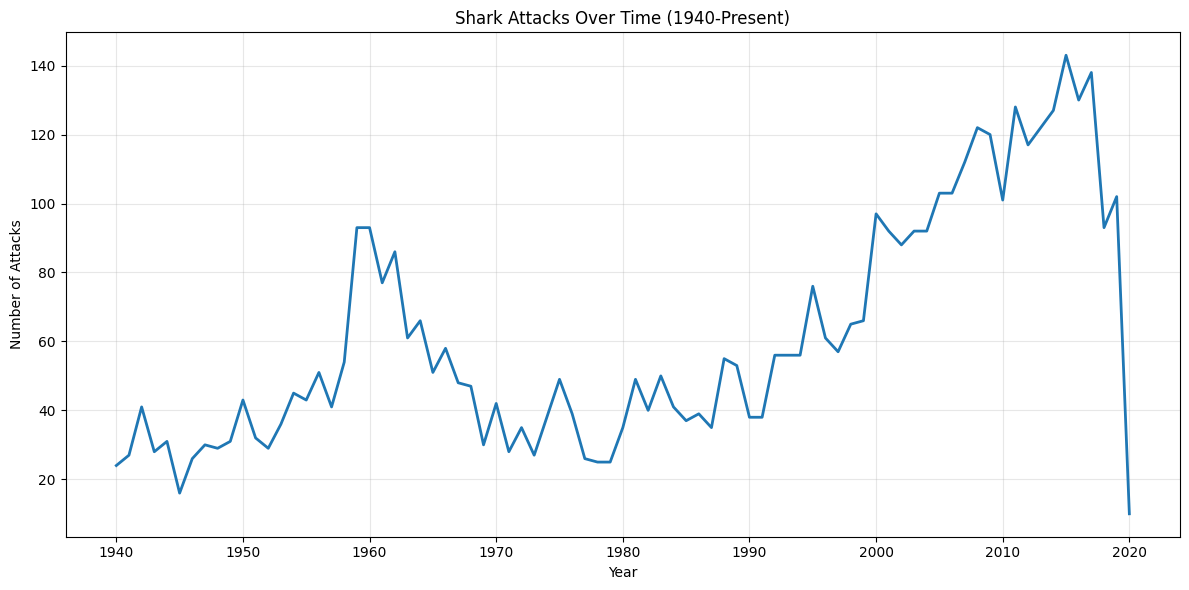


Attacks in 1940s: 283
Attacks in 2010s: 1211

Trend analysis:
Slope: 0.99 attacks per year
R-squared: 0.4814
P-value: 6.9342e-13
Attacks are INCREASING over time


In [22]:
print("Original Year variable:")
print(sharks_clean['Year'].value_counts().head(20))
print(f"\nData type: {sharks_clean['Year'].dtype}")

def clean_year(year):
    if pd.isna(year):
        return np.nan

    year_str = str(year).strip()
    year_str = year_str.replace('.0', '')

    import re
    match = re.search(r'\d+', year_str)
    if match:
        year_num = int(match.group())
        if 1500 <= year_num <= 2025:
            return year_num

    return np.nan

sharks_clean['Year_clean'] = sharks_clean['Year'].apply(clean_year)

print(f"\nRange of cleaned years:")
print(f"Min: {sharks_clean['Year_clean'].min()}")
print(f"Max: {sharks_clean['Year_clean'].max()}")
print(f"Missing values: {sharks_clean['Year_clean'].isna().sum()}")

sharks_1940 = sharks_clean[sharks_clean['Year_clean'] >= 1940].copy()
print(f"\nAttacks since 1940: {len(sharks_1940)}")

attacks_by_year = sharks_1940.groupby('Year_clean').size()

plt.figure(figsize=(12, 6))
plt.plot(attacks_by_year.index, attacks_by_year.values, linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Shark Attacks Over Time (1940-Present)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nAttacks in 1940s: {len(sharks_1940[sharks_1940['Year_clean'] < 1950])}")
print(f"Attacks in 2010s: {len(sharks_1940[sharks_1940['Year_clean'] >= 2010])}")

from scipy import stats
years = attacks_by_year.index.values
counts = attacks_by_year.values
slope, intercept, r_value, p_value, std_err = stats.linregress(years, counts)
print(f"\nTrend analysis:")
print(f"Slope: {slope:.2f} attacks per year")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4e}")

if slope > 0 and p_value < 0.05:
    print("Attacks are INCREASING over time")
elif slope < 0 and p_value < 0.05:
    print("Attacks are DECREASING over time")
else:
    print("Attacks are REMAINING CONSTANT over time")

Original Age variable:
Age
17    136
18    132
20    130
19    129
15    124
16    123
21    111
22    106
25    105
24    102
14     94
13     83
28     78
26     77
29     76
23     75
30     73
27     71
32     70
35     66
Name: count, dtype: int64

Cleaned Age statistics:
count    3253.000000
mean       27.890255
std        14.170242
min         1.000000
25%        17.000000
50%        24.000000
75%        36.000000
max        87.000000
Name: Age_clean, dtype: float64
Missing values: 1683


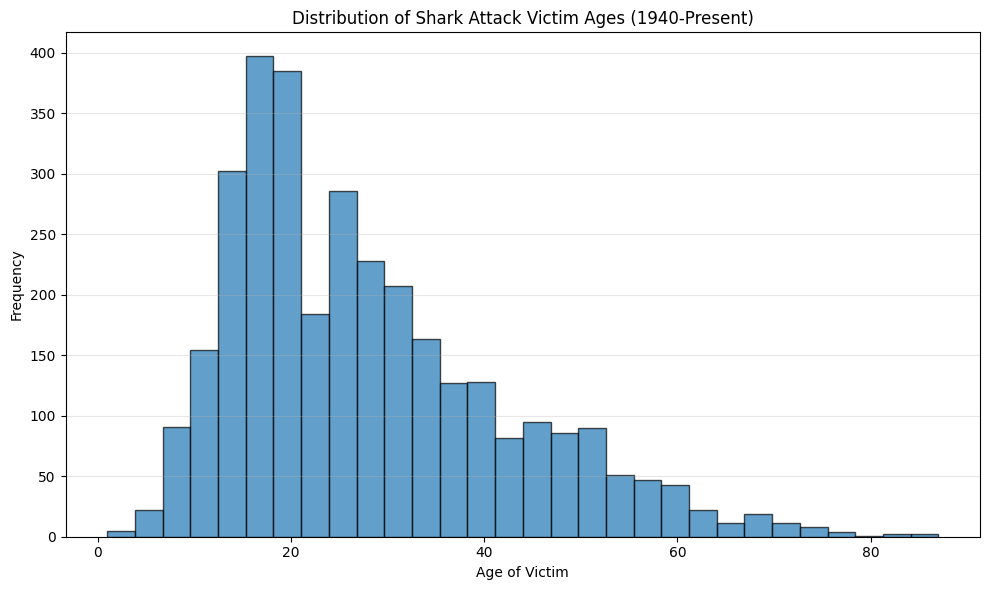


Most common age: 20.0
Median age: 24.0


In [23]:
print("Original Age variable:")
print(sharks_1940['Age'].value_counts().head(20))

def clean_age(age):
    if pd.isna(age):
        return np.nan

    age_str = str(age).strip().lower()

    import re
    match = re.search(r'\d+', age_str)
    if match:
        age_num = int(match.group())
        if 0 <= age_num <= 100:
            return age_num

    return np.nan

sharks_1940['Age_clean'] = sharks_1940['Age'].apply(clean_age)

print(f"\nCleaned Age statistics:")
print(sharks_1940['Age_clean'].describe())
print(f"Missing values: {sharks_1940['Age_clean'].isna().sum()}")

plt.figure(figsize=(10, 6))
plt.hist(sharks_1940['Age_clean'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Age of Victim')
plt.ylabel('Frequency')
plt.title('Distribution of Shark Attack Victim Ages (1940-Present)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

if len(sharks_1940['Age_clean'].mode()) > 0:
    print(f"\nMost common age: {sharks_1940['Age_clean'].mode().values[0]}")
print(f"Median age: {sharks_1940['Age_clean'].median()}")

In [24]:
print("Original Type variable:")
print(sharks_1940['Type'].value_counts())

def clean_type(attack_type):
    if pd.isna(attack_type):
        return 'Unknown'

    type_str = str(attack_type).strip().lower()

    if 'unprovoked' in type_str:
        return 'Unprovoked'
    elif 'provoked' in type_str:
        return 'Provoked'
    else:
        return 'Unknown'

sharks_1940['Type_clean'] = sharks_1940['Type'].apply(clean_type)

print("\nCleaned Type variable:")
print(sharks_1940['Type_clean'].value_counts())

total_attacks = len(sharks_1940)
unprovoked = (sharks_1940['Type_clean'] == 'Unprovoked').sum()
prop_unprovoked = unprovoked / total_attacks

print(f"\nProportion of unprovoked attacks: {prop_unprovoked:.4f} ({prop_unprovoked*100:.2f}%)")

Original Type variable:
Type
Unprovoked             3626
Provoked                472
Invalid                 402
Sea Disaster            153
Boat                    109
Boating                  92
Watercraft               66
Questionable             10
Under investigation       1
Unverified                1
Unconfirmed               1
Boatomg                   1
Name: count, dtype: int64

Cleaned Type variable:
Type_clean
Unprovoked    3626
Unknown        838
Provoked       472
Name: count, dtype: int64

Proportion of unprovoked attacks: 0.7346 (73.46%)


In [27]:
print("Original Fatal (Y/N) variable:")
print(sharks_1940['Fatal (Y/N)'].value_counts(dropna=False))

def clean_fatal(fatal):
    if pd.isna(fatal):
        return 'Unknown'

    fatal_str = str(fatal).strip().upper()

    if fatal_str in ['Y', 'YES']:
        return 'Y'
    elif fatal_str in ['N', 'NO']:
        return 'N'
    else:
        return 'Unknown'

sharks_1940['Fatal_clean'] = sharks_1940['Fatal (Y/N)'].apply(clean_fatal)

print("\nCleaned Fatal variable:")
print(sharks_1940['Fatal_clean'].value_counts())

Original Fatal (Y/N) variable:
Fatal (Y/N)
N          3749
Y           746
NaN         392
UNKNOWN      45
F             2
M             1
2017          1
Name: count, dtype: int64

Cleaned Fatal variable:
Fatal_clean
N          3749
Y           746
Unknown     441
Name: count, dtype: int64


In [26]:
print("Cross-tabulation: Type vs Fatal")
crosstab = pd.crosstab(
    sharks_1940['Type_clean'],
    sharks_1940['Fatal_clean'],
    margins=True
)
print(crosstab)

print("\nFatality rates by attack type:")

for attack_type in ['Provoked', 'Unprovoked']:
    subset = sharks_1940[sharks_1940['Type_clean'] == attack_type]
    total = len(subset)
    fatal = (subset['Fatal_clean'] == 'Y').sum()
    non_fatal = (subset['Fatal_clean'] == 'N').sum()

    known_outcome = fatal + non_fatal
    if known_outcome > 0:
        fatality_rate = fatal / known_outcome
        print(f"\n{attack_type}:")
        print(f"  Total attacks: {total}")
        print(f"  Fatal: {fatal}")
        print(f"  Non-fatal: {non_fatal}")
        print(f"  Fatality rate: {fatality_rate:.4f} ({fatality_rate*100:.2f}%)")

Cross-tabulation: Type vs Fatal
Fatal_clean     N  Unknown    Y   All
Type_clean                           
Provoked      453        8   11   472
Unknown       330      392  116   838
Unprovoked   2966       41  619  3626
All          3749      441  746  4936

Fatality rates by attack type:

Provoked:
  Total attacks: 472
  Fatal: 11
  Non-fatal: 453
  Fatality rate: 0.0237 (2.37%)

Unprovoked:
  Total attacks: 3626
  Fatal: 619
  Non-fatal: 2966
  Fatality rate: 0.1727 (17.27%)


Unprovoked attacks are more likely to be fatal than provoked attacks. This is probably because unprovoked attacks involve sharks actively hunting, which causes more serious injuries, while provoked attacks happen when someone accidentally bothers a shark and it just defends itself with a quick bite.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. What is this paper about?
The paper is about establishing a standard framework for structuring datasets to make data cleaning and analysis easier. It presents the "tidy data" standard and explains common problems with messy datasets and how to fix them.

2. What is the "tidy data standard" intended to accomplish?
The tidy data standard is intended to provide a consistent way to organize data that makes it easier to manipulate, model, and visualize. By standardizing the structure of datasets, it reduces the time spent on data cleaning and makes it easier to use tools that expect data in a specific format.


3. Interpret the two sentences
"Like families, tidy datasets are all alike but every messy dataset is messy in its own way."
This means that all tidy datasets follow the same structure and principles, so they look similar. However, messy datasets can be messy in many different ways - some have variables in rows, others have multiple variables in one column, etc. There's only one way to be tidy, but endless ways to be messy.
"For a given dataset, it's usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
This means that when you're looking at a specific dataset, you can usually tell what should be a row (observation) and what should be a column (variable) based on context. But creating a universal definition that works for all datasets is really hard because what counts as an observation depends on what you're studying and what questions you're asking.


4. How does Wickham define values, variables, and observations?

Values: A value is a single piece of data - it could be a number or a string
Variables: A variable contains all values that measure the same attribute (like height, temperature, or duration) across units
Observations: An observation contains all values measured on the same unit (like a person, day, or location) across attributes

5. How is "Tidy Data" defined in section 2.3?
Tidy data is defined by three principles:

Each variable forms a column
Each observation forms a row
Each type of observational unit forms a table

6. Five most common problems, Table 4, and melting
The 5 most common problems with messy datasets:

Column headers are values, not variable names
Multiple variables are stored in one column
Variables are stored in both rows and columns
Multiple types of observational units are stored in the same table
A single observational unit is stored in multiple tables

Why Table 4 is messy:
Table 4 is messy because the column headers (like "a", "b", "c") are actually values of a variable (treatment type), not variable names. The data should have a "treatment" variable and a separate column for the measurement values.
What is "melting" a dataset:
Melting a dataset means transforming it from wide format to long format by taking column headers that are actually values and turning them into rows. This creates a new variable to hold those former column names and stacks all the values into fewer columns.

7. Why is Table 11 messy but Table 12 tidy and "molten"?
Table 11 is messy because it has variables stored in both rows and columns - the days (d1-d31) are spread across columns as headers, and the tmin/tmax measurements are in rows. This violates the tidy data principle that each variable should form a column.
Table 12 is tidy and "molten" because it has been restructured so that:

Each variable (id, date, element, value) forms its own column
Each observation (a specific measurement on a specific day) forms a row
The day information that was spread across multiple columns has been "melted" into a single "date" column, and the temperature type (tmin/tmax) is now in an "element" column

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gifts = pd.read_csv('data/ForeignGifts_edu.csv', encoding='latin-1')

print(f"Dataset shape: {gifts.shape}")
print(f"\nColumn names:")
print(gifts.columns.tolist())
print(f"\nFirst few rows:")
print(gifts.head())

Dataset shape: (28221, 10)

Column names:
['ID', 'OPEID', 'Institution Name', 'City', 'State', 'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type', 'Country of Giftor', 'Giftor Name']

First few rows:
   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479   

Foreign Gift Amount variable:
count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

Missing values: 0


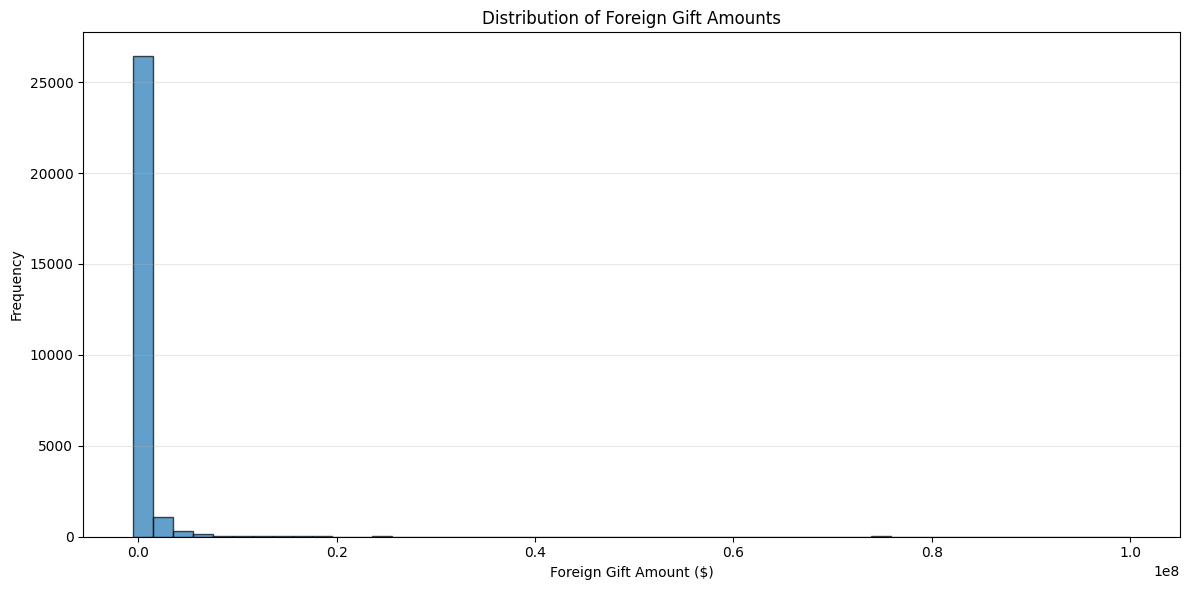

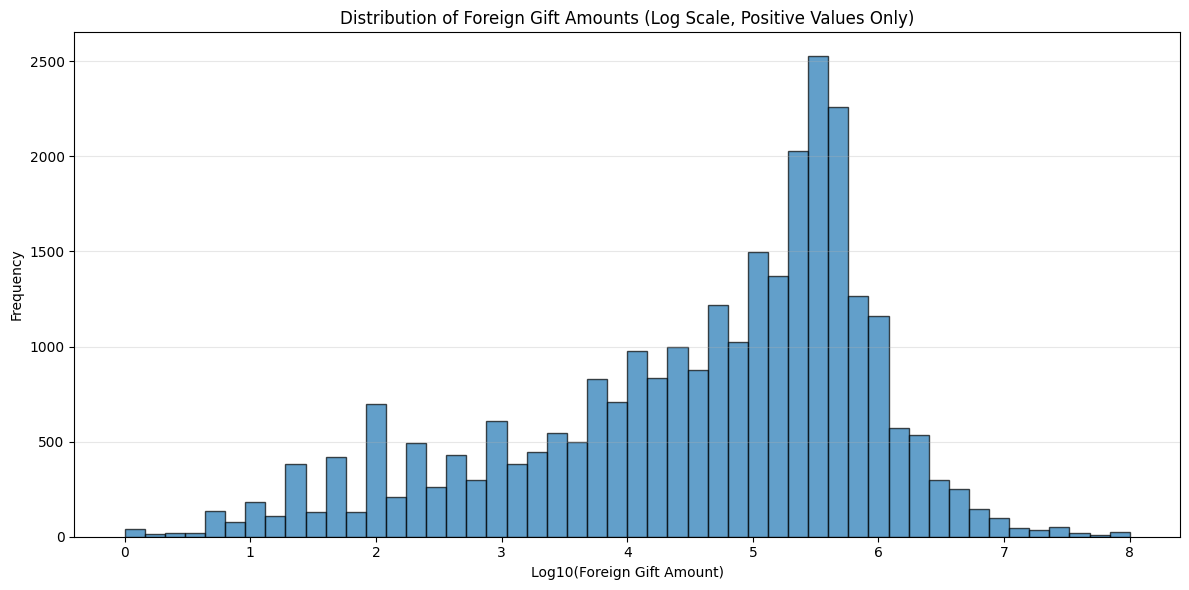


Descriptive statistics:
Mean: $588,232.72
Median: $94,615.00
Max: $99,999,999.00
Min: $-537,770.00


In [30]:
print("Foreign Gift Amount variable:")
print(gifts['Foreign Gift Amount'].describe())
print(f"\nMissing values: {gifts['Foreign Gift Amount'].isna().sum()}")

plt.figure(figsize=(12, 6))
plt.hist(gifts['Foreign Gift Amount'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Foreign Gift Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amounts')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

positive_amounts = gifts['Foreign Gift Amount'][gifts['Foreign Gift Amount'] > 0].dropna()

plt.figure(figsize=(12, 6))
plt.hist(np.log10(positive_amounts), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Log10(Foreign Gift Amount)')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amounts (Log Scale, Positive Values Only)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nDescriptive statistics:")
print(f"Mean: ${gifts['Foreign Gift Amount'].mean():,.2f}")
print(f"Median: ${gifts['Foreign Gift Amount'].median():,.2f}")
print(f"Max: ${gifts['Foreign Gift Amount'].max():,.2f}")
print(f"Min: ${gifts['Foreign Gift Amount'].min():,.2f}")

Gift Type value counts:
Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


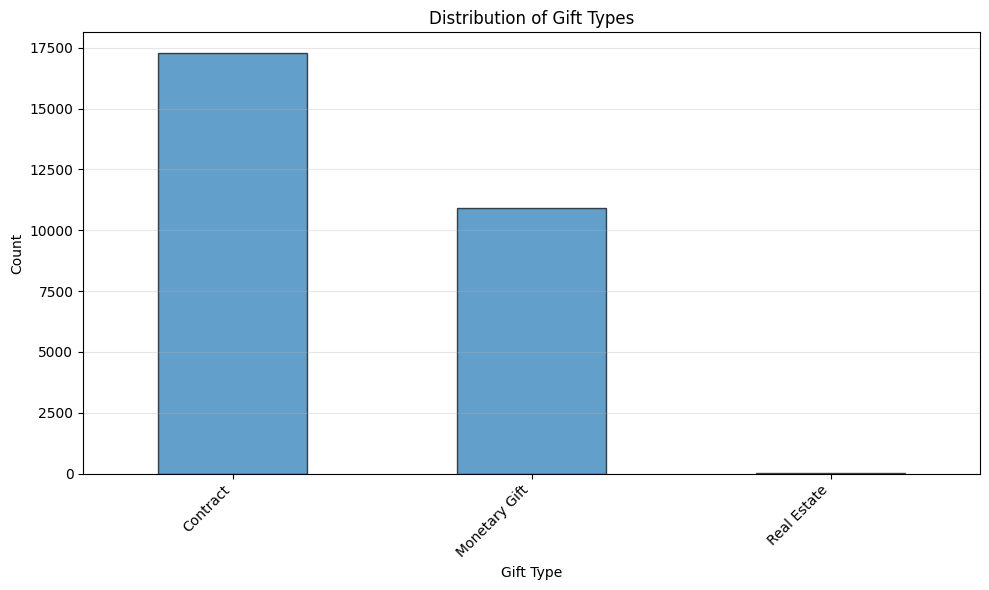

In [31]:
print("Gift Type value counts:")
print(gifts['Gift Type'].value_counts())

print("\nProportions:")
total = len(gifts)
proportions = gifts['Gift Type'].value_counts() / total
print(proportions)

plt.figure(figsize=(10, 6))
gifts['Gift Type'].value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Gift Type')
plt.ylabel('Count')
plt.title('Distribution of Gift Types')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Top 15 countries by NUMBER of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


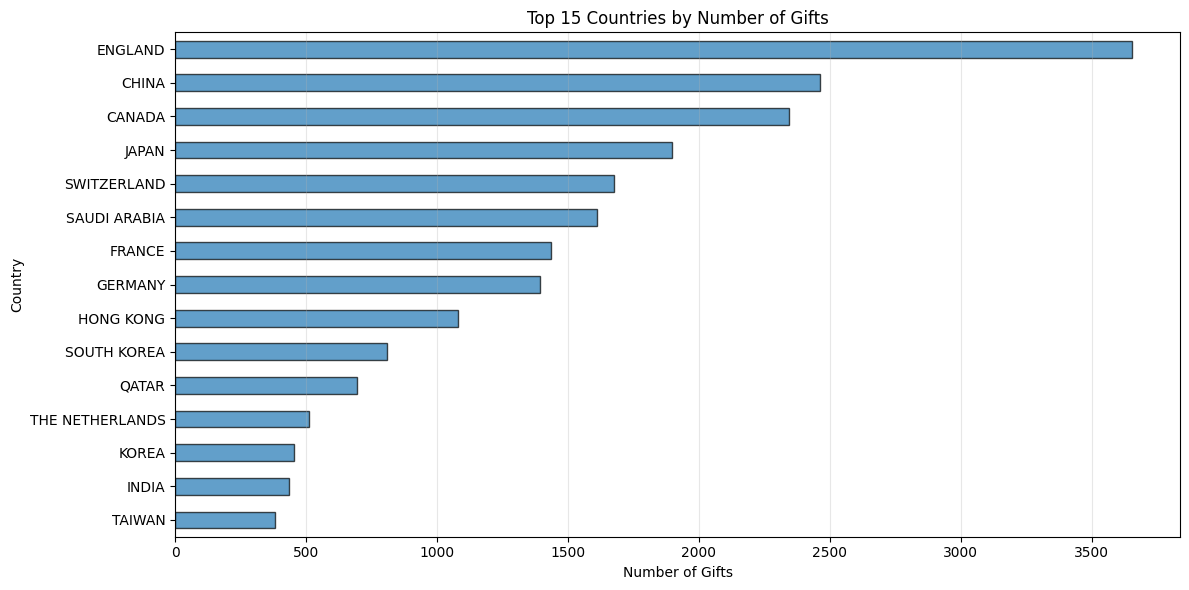


Top 15 countries by TOTAL AMOUNT given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


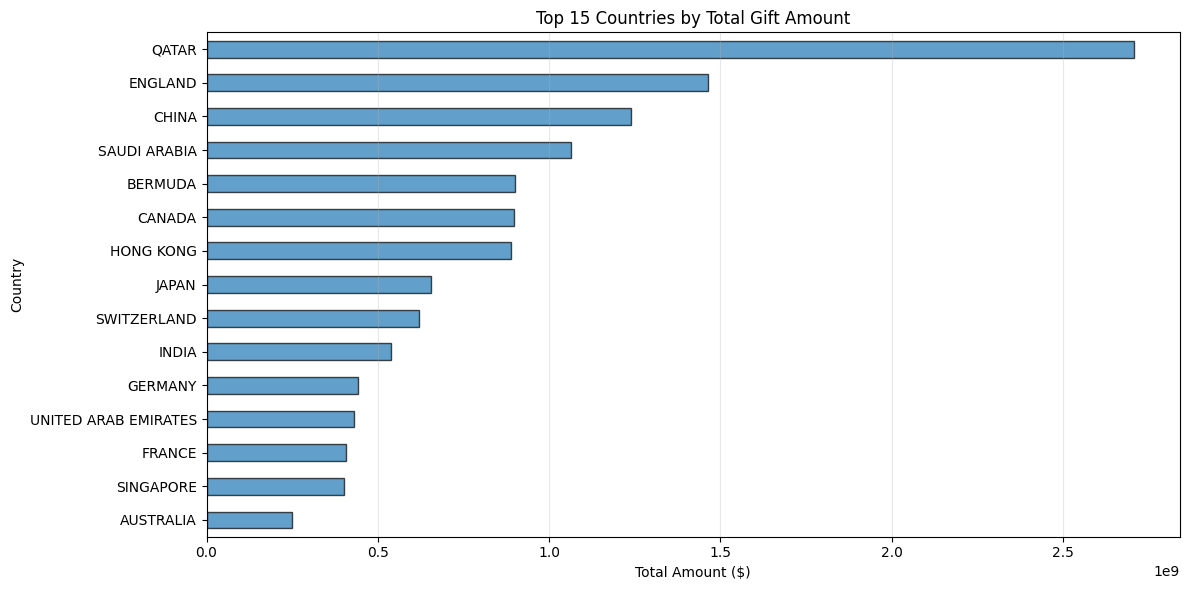

In [34]:
print("Top 15 countries by NUMBER of gifts:")
top_countries_count = gifts['Country of Giftor'].value_counts().head(15)
print(top_countries_count)

plt.figure(figsize=(12, 6))
top_countries_count.plot(kind='barh', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Gifts')
plt.ylabel('Country')
plt.title('Top 15 Countries by Number of Gifts')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nTop 15 countries by TOTAL AMOUNT given:")
top_countries_amount = gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_countries_amount)

plt.figure(figsize=(12, 6))
top_countries_amount.plot(kind='barh', edgecolor='black', alpha=0.7)
plt.xlabel('Total Amount ($)')
plt.ylabel('Country')
plt.title('Top 15 Countries by Total Gift Amount')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

Top 15 institutions by TOTAL AMOUNT received:
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int

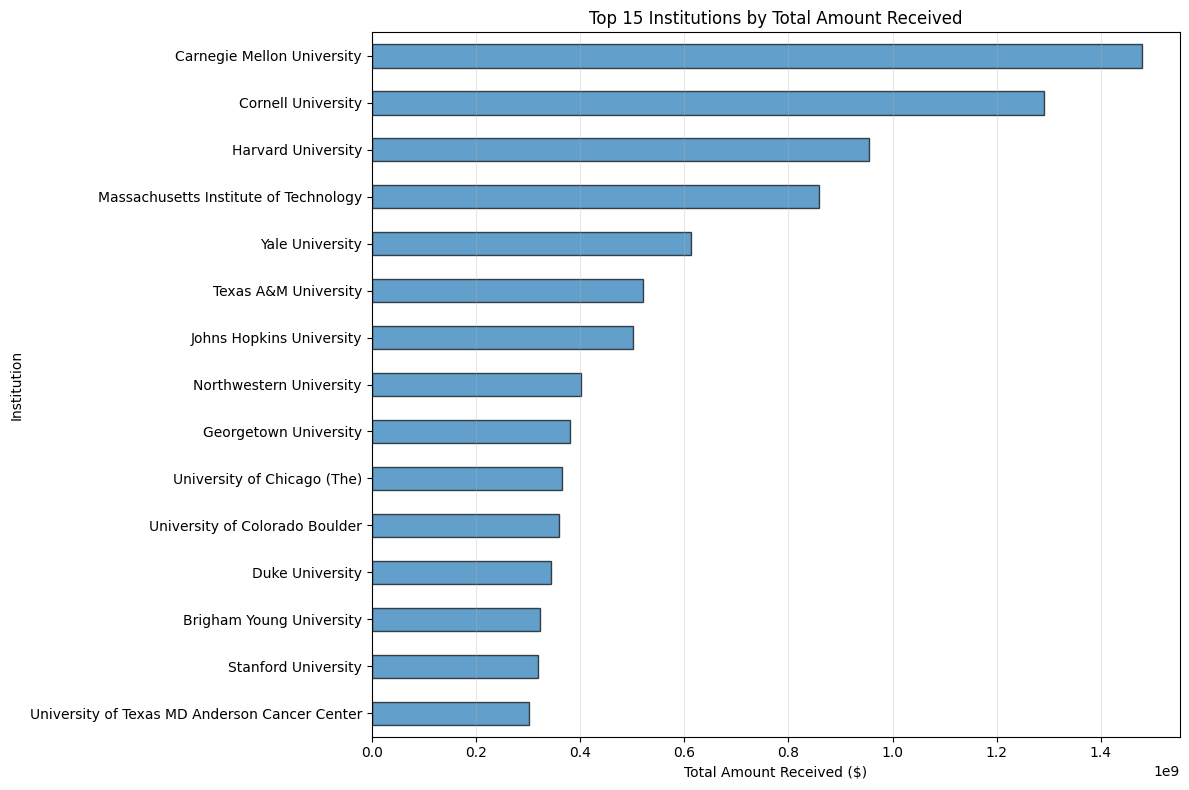

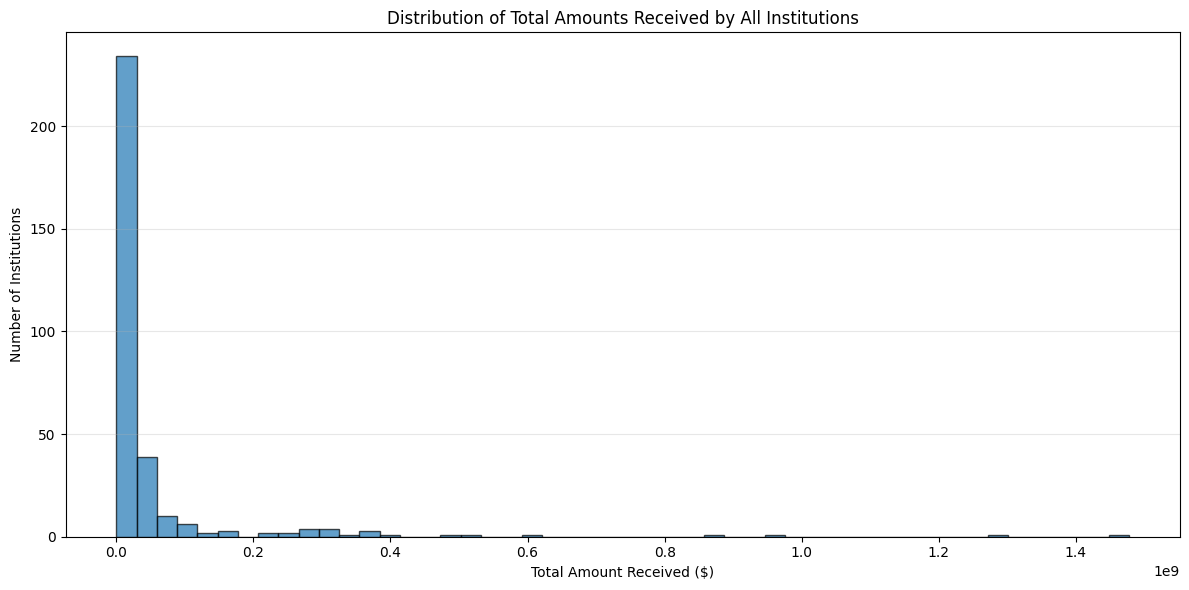

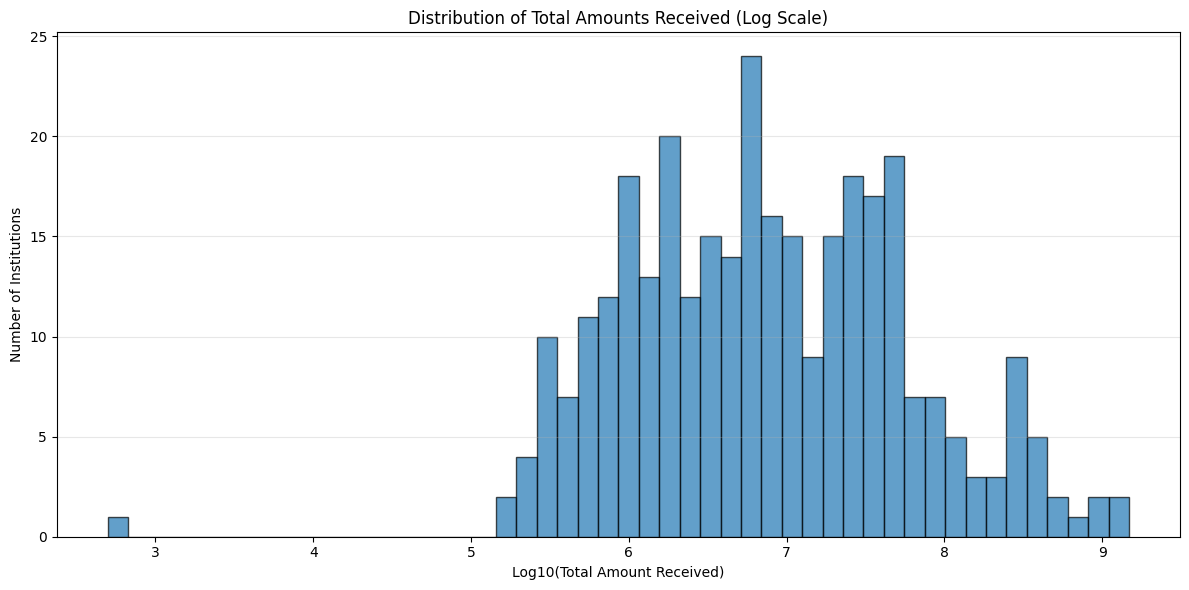

In [35]:
print("Top 15 institutions by TOTAL AMOUNT received:")
top_institutions = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_institutions)

plt.figure(figsize=(12, 8))
top_institutions.plot(kind='barh', edgecolor='black', alpha=0.7)
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Institution')
plt.title('Top 15 Institutions by Total Amount Received')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

institution_totals = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure(figsize=(12, 6))
plt.hist(institution_totals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Amounts Received by All Institutions')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

positive_totals = institution_totals[institution_totals > 0]

plt.figure(figsize=(12, 6))
plt.hist(np.log10(positive_totals), bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Log10(Total Amount Received)')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Amounts Received (Log Scale)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Top 20 giftors by TOTAL AMOUNT provided:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Sanofi-Aventis Recerche                  62106706
Saudi Arabia                             59450098
Sanofi-Aventis Recherche                 58520202
Skolkovo Foundation                      515000

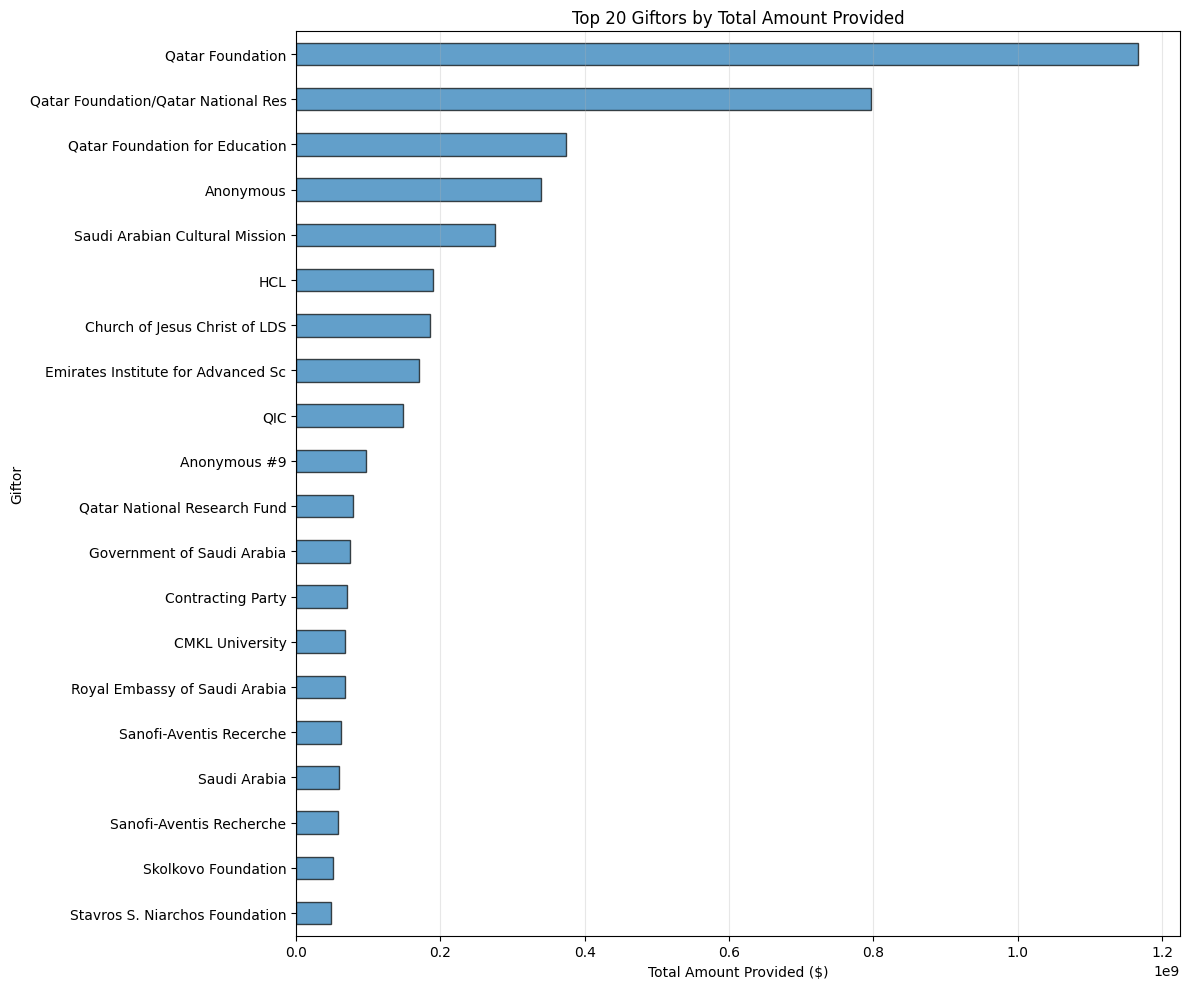

In [36]:
print("Top 20 giftors by TOTAL AMOUNT provided:")
top_giftors = gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(20)
print(top_giftors)

plt.figure(figsize=(12, 10))
top_giftors.plot(kind='barh', edgecolor='black', alpha=0.7)
plt.xlabel('Total Amount Provided ($)')
plt.ylabel('Giftor')
plt.title('Top 20 Giftors by Total Amount Provided')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

college = pd.read_csv('data/college_completion.csv', encoding='latin-1')

print(f"Number of observations: {college.shape[0]}")
print(f"Number of variables: {college.shape[1]}")

print("\nFirst few rows:")
print(college.head())

print("\nColumn names:")
print(college.columns.tolist())

print("\nData types:")
print(college.dtypes)

Number of observations: 3798
Number of variables: 63

First few rows:
   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            

In [38]:
print("Cross-tabulation of control and level:")
crosstab = pd.crosstab(college['control'], college['level'], margins=True)
print(crosstab)

print("\nProportions (by row):")
crosstab_prop = pd.crosstab(college['control'], college['level'], normalize='index')
print(crosstab_prop)

Cross-tabulation of control and level:
level                   2-year  4-year   All
control                                     
Private for-profit         465     527   992
Private not-for-profit      68    1180  1248
Public                     926     632  1558
All                       1459    2339  3798

Proportions (by row):
level                     2-year    4-year
control                                   
Private for-profit      0.468750  0.531250
Private not-for-profit  0.054487  0.945513
Public                  0.594352  0.405648


Most 4-year institutions are either public or private not-for-profit, while 2-year institutions are predominantly public. Private for-profit institutions are more common at the 2-year level than the 4-year leve

Overall grad_100_value statistics:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


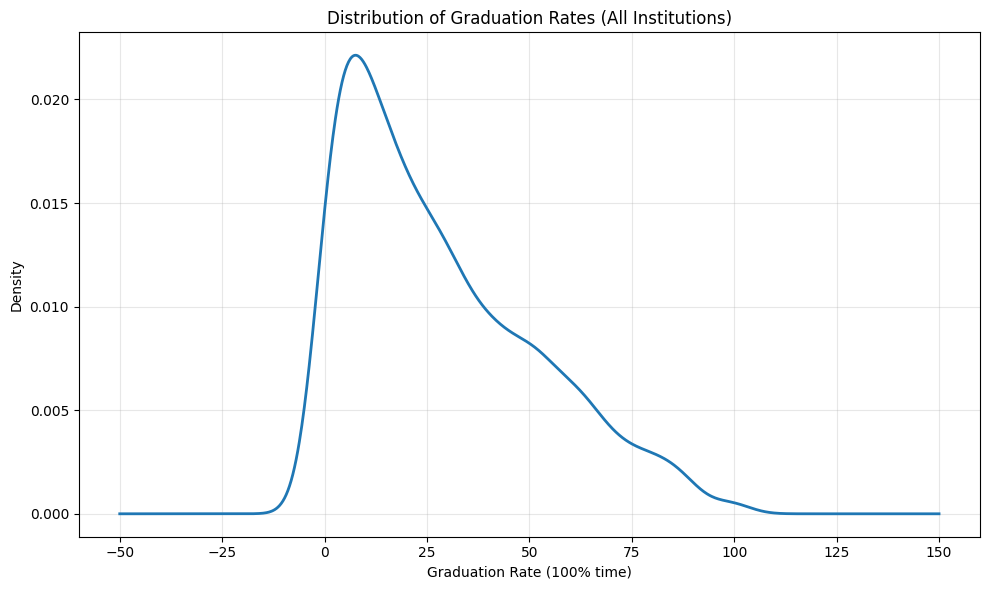


Graduation rates by institutional control:

Public:
count    1499.000000
mean       17.430887
std        14.729443
min         0.000000
25%         6.900000
50%        13.200000
75%        23.250000
max        97.800000
Name: grad_100_value, dtype: float64

Private not-for-profit:
count    1189.000000
mean       41.660976
std        23.551231
min         0.000000
25%        25.000000
50%        41.000000
75%        58.300000
max       100.000000
Name: grad_100_value, dtype: float64

Private for-profit:
count    779.000000
mean      29.108858
std       25.601687
min        0.000000
25%        6.950000
50%       24.700000
75%       46.750000
max      100.000000
Name: grad_100_value, dtype: float64


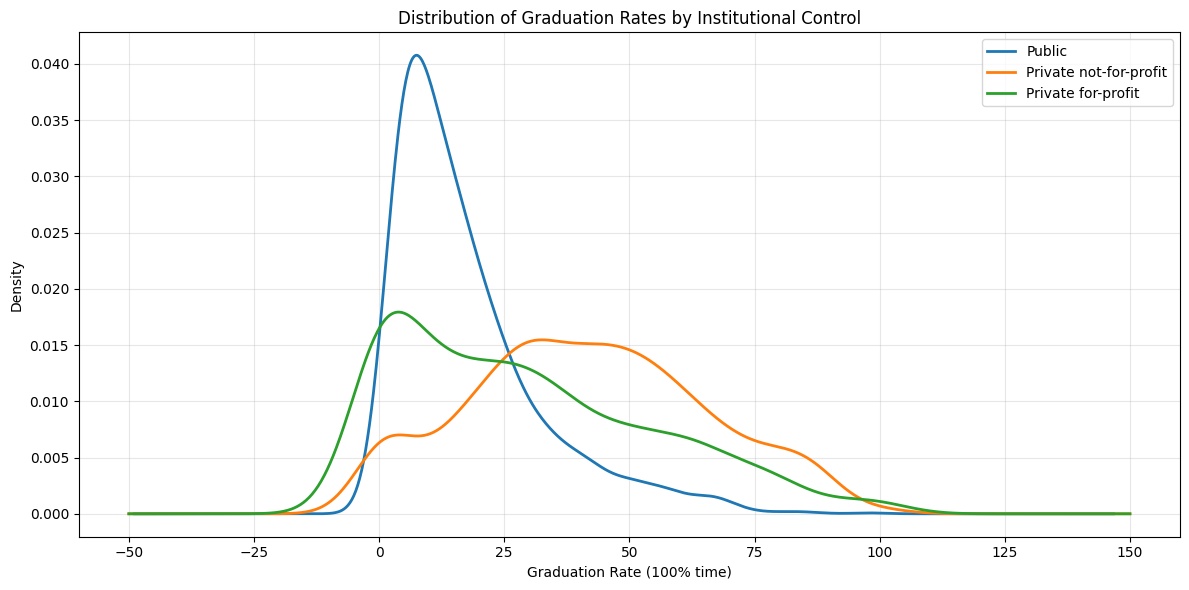

In [39]:
print("Overall grad_100_value statistics:")
print(college['grad_100_value'].describe())

plt.figure(figsize=(10, 6))
college['grad_100_value'].dropna().plot(kind='kde', linewidth=2)
plt.xlabel('Graduation Rate (100% time)')
plt.ylabel('Density')
plt.title('Distribution of Graduation Rates (All Institutions)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("Graduation rates by institutional control:")
print("="*80)

for control_type in college['control'].unique():
    if pd.notna(control_type):
        subset = college[college['control'] == control_type]['grad_100_value'].dropna()
        print(f"\n{control_type}:")
        print(subset.describe())

plt.figure(figsize=(12, 6))
for control_type in college['control'].unique():
    if pd.notna(control_type):
        subset = college[college['control'] == control_type]['grad_100_value'].dropna()
        if len(subset) > 0:
            subset.plot(kind='kde', linewidth=2, label=control_type)

plt.xlabel('Graduation Rate (100% time)')
plt.ylabel('Density')
plt.title('Distribution of Graduation Rates by Institutional Control')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Private not-for-profit institutions appear to have the most favorable graduation rates, with a higher median and more density at higher graduation rates. Private for-profit institutions have the lowest graduation rates on average.

Covariance and Correlation (overall):
Covariance: 88610.48
Correlation: 0.5759


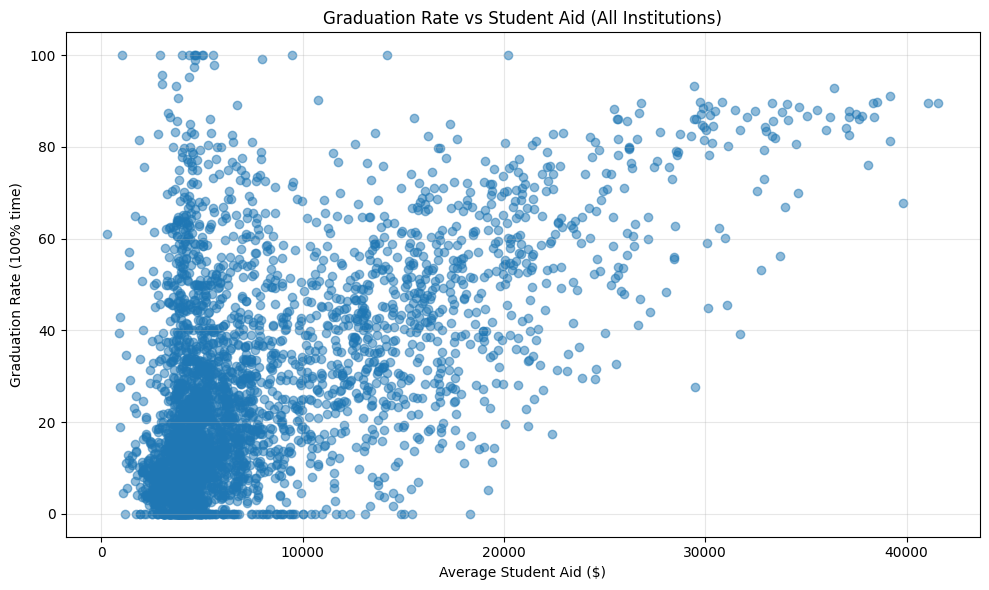

In [40]:
valid_data = college[['grad_100_value', 'aid_value']].dropna()

print("Covariance and Correlation (overall):")
print(f"Covariance: {valid_data['grad_100_value'].cov(valid_data['aid_value']):.2f}")
print(f"Correlation: {valid_data['grad_100_value'].corr(valid_data['aid_value']):.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(valid_data['aid_value'], valid_data['grad_100_value'], alpha=0.5)
plt.xlabel('Average Student Aid ($)')
plt.ylabel('Graduation Rate (100% time)')
plt.title('Graduation Rate vs Student Aid (All Institutions)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Covariance and Correlation by institutional control:

Public:
  Covariance: 15355.15
  Correlation: 0.4825
  N: 1499

Private not-for-profit:
  Covariance: 109274.12
  Correlation: 0.6016
  N: 1189

Private for-profit:
  Covariance: 6897.52
  Correlation: 0.1884
  N: 778


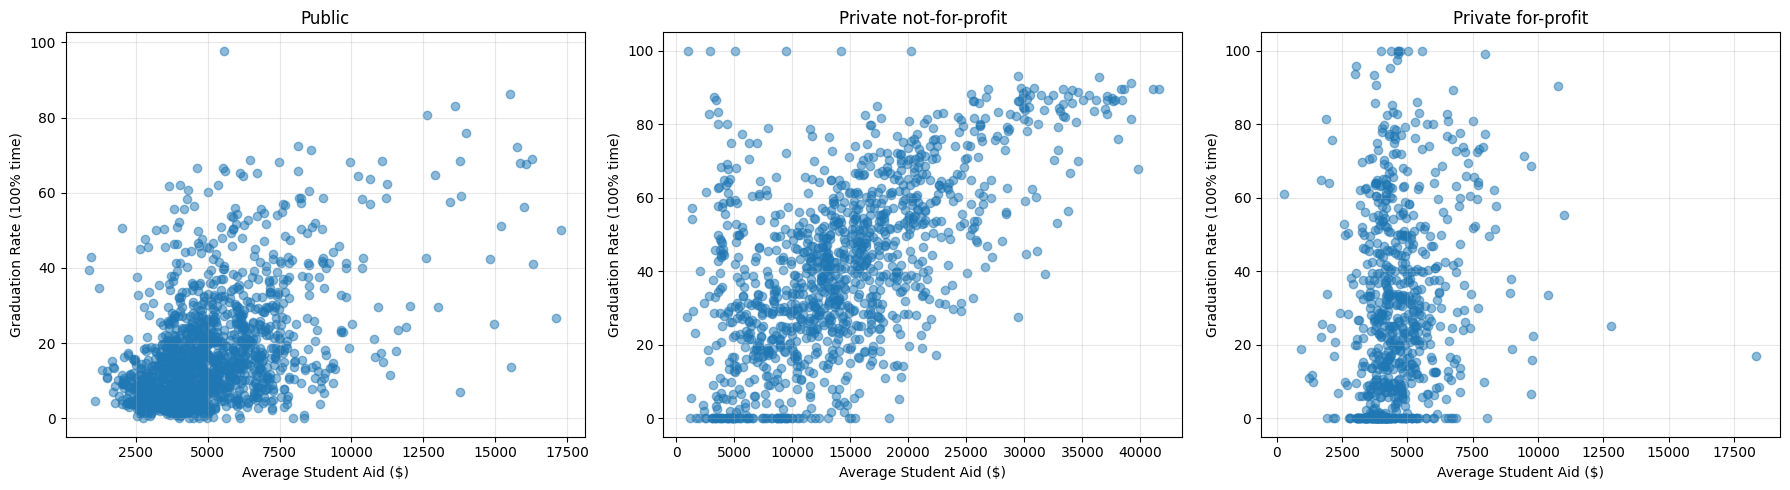

In [41]:
print("\n" + "="*80)
print("Covariance and Correlation by institutional control:")
print("="*80)

for control_type in college['control'].unique():
    if pd.notna(control_type):
        subset = college[college['control'] == control_type][['grad_100_value', 'aid_value']].dropna()
        if len(subset) > 1:
            cov = subset['grad_100_value'].cov(subset['aid_value'])
            corr = subset['grad_100_value'].corr(subset['aid_value'])
            print(f"\n{control_type}:")
            print(f"  Covariance: {cov:.2f}")
            print(f"  Correlation: {corr:.4f}")
            print(f"  N: {len(subset)}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, control_type in enumerate(college['control'].unique()):
    if pd.notna(control_type) and idx < 3:
        subset = college[college['control'] == control_type][['grad_100_value', 'aid_value']].dropna()
        if len(subset) > 0:
            axes[idx].scatter(subset['aid_value'], subset['grad_100_value'], alpha=0.5)
            axes[idx].set_xlabel('Average Student Aid ($)')
            axes[idx].set_ylabel('Graduation Rate (100% time)')
            axes[idx].set_title(f'{control_type}')
            axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

1. Show that m(a + bX) = a + b × m(X)
Proof:
m(a + bX) = (1/N) Σᵢ₌₁ᴺ (a + bxᵢ)
= (1/N) Σᵢ₌₁ᴺ a + (1/N) Σᵢ₌₁ᴺ bxᵢ
= (1/N)(Na) + b(1/N) Σᵢ₌₁ᴺ xᵢ
= a + b × m(X)

2. Show that cov(X, X) = s²
Proof:
cov(X, X) = (1/N) Σᵢ₌₁ᴺ (xᵢ - m(X))(xᵢ - m(X))
= (1/N) Σᵢ₌₁ᴺ (xᵢ - m(X))²
= s²

3. Show that cov(X, a + bY) = b × cov(X, Y)
Proof:
cov(X, a + bY) = (1/N) Σᵢ₌₁ᴺ (xᵢ - m(X))((a + byᵢ) - m(a + bY))
From part 1, we know m(a + bY) = a + b × m(Y)
= (1/N) Σᵢ₌₁ᴺ (xᵢ - m(X))((a + byᵢ) - (a + b × m(Y)))
= (1/N) Σᵢ₌₁ᴺ (xᵢ - m(X))(byᵢ - b × m(Y))
= (1/N) Σᵢ₌₁ᴺ (xᵢ - m(X)) × b(yᵢ - m(Y))
= b(1/N) Σᵢ₌₁ᴺ (xᵢ - m(X))(yᵢ - m(Y))
= b × cov(X, Y)

4. Show that cov(a + bX, a + bY) = b² × cov(X, Y)
Proof:
cov(a + bX, a + bY) = (1/N) Σᵢ₌₁ᴺ ((a + bxᵢ) - m(a + bX))((a + byᵢ) - m(a + bY))
From part 1: m(a + bX) = a + b × m(X) and m(a + bY) = a + b × m(Y)
= (1/N) Σᵢ₌₁ᴺ ((a + bxᵢ) - (a + b × m(X)))((a + byᵢ) - (a + b × m(Y)))
= (1/N) Σᵢ₌₁ᴺ (b(xᵢ - m(X)))(b(yᵢ - m(Y)))
= (1/N) Σᵢ₌₁ᴺ b²(xᵢ - m(X))(yᵢ - m(Y))
= b² × (1/N) Σᵢ₌₁ᴺ (xᵢ - m(X))(yᵢ - m(Y))
= b² × cov(X, Y)


5. Median and IQR of Linear Transformations
For median (b > 0):
Yes, med(a + bX) = a + b × med(X)
Reasoning: Since b > 0, the transformation a + bX preserves the order of values. The middle value in the ordered list of X becomes the middle value in the ordered list of a + bX after applying the transformation.
For IQR:
IQR(a + bX) = b × IQR(X), NOT a + b × IQR(X)
Reasoning: IQR = Q3 - Q1. When we transform X to a + bX:

Q3(a + bX) = a + b × Q3(X)
Q1(a + bX) = a + b × Q1(X)
IQR(a + bX) = (a + b × Q3(X)) - (a + b × Q1(X)) = b × (Q3(X) - Q1(X)) = b × IQR(X)

In [42]:
import numpy as np
import pandas as pd

X = np.array([1, 2, 3, 4, 5])

mean_X = X.mean()
print(f"m(X) = {mean_X}")

X_squared = X**2
mean_X_squared = X_squared.mean()
mean_X_then_squared = (mean_X)**2

print(f"\nm(X²) = {mean_X_squared}")
print(f"(m(X))² = {mean_X_then_squared}")
print(f"Are they equal? {mean_X_squared == mean_X_then_squared}")
print(f"Difference: {mean_X_squared - mean_X_then_squared}")

X_sqrt = np.sqrt(X)
mean_X_sqrt = X_sqrt.mean()
sqrt_mean_X = np.sqrt(mean_X)

print(f"\nm(√X) = {mean_X_sqrt}")
print(f"√(m(X)) = {sqrt_mean_X}")
print(f"Are they equal? {np.isclose(mean_X_sqrt, sqrt_mean_X)}")
print(f"Difference: {mean_X_sqrt - sqrt_mean_X}")

m(X) = 3.0

m(X²) = 11.0
(m(X))² = 9.0
Are they equal? False
Difference: 2.0

m(√X) = 1.6764664694883524
√(m(X)) = 1.7320508075688772
Are they equal? False
Difference: -0.055584338080524764


The means of X² and √X are generally not equal to (m(X))² and √(m(X)) because the linearity property only holds for linear transformations of the form Y = a + bX, not for non-linear transformations like squaring or taking square roots.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

Dataset shape: (2930, 82)

Column names:
['Order', 'PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Garage.Qua

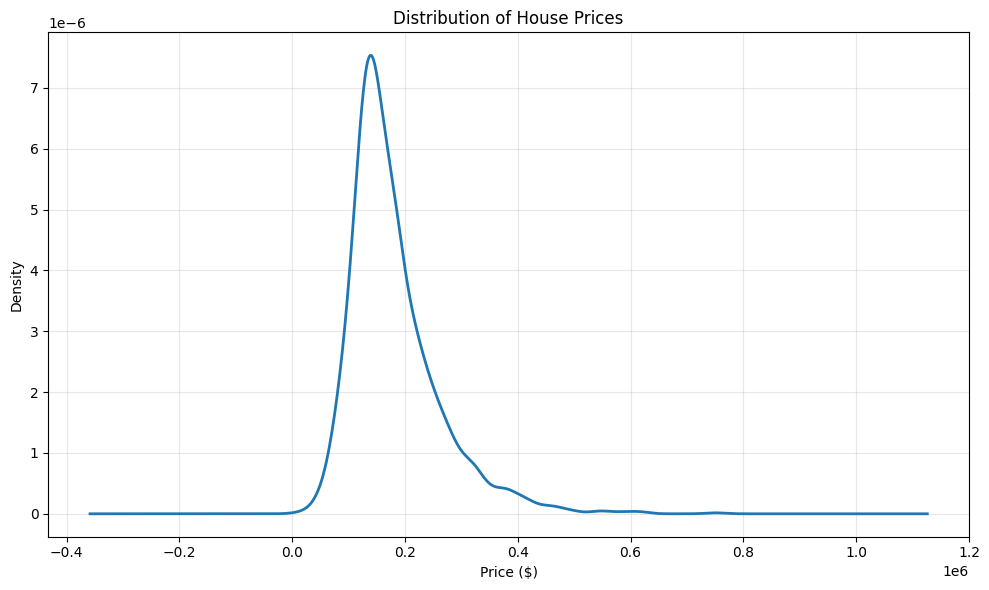


Price statistics by building type:
            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


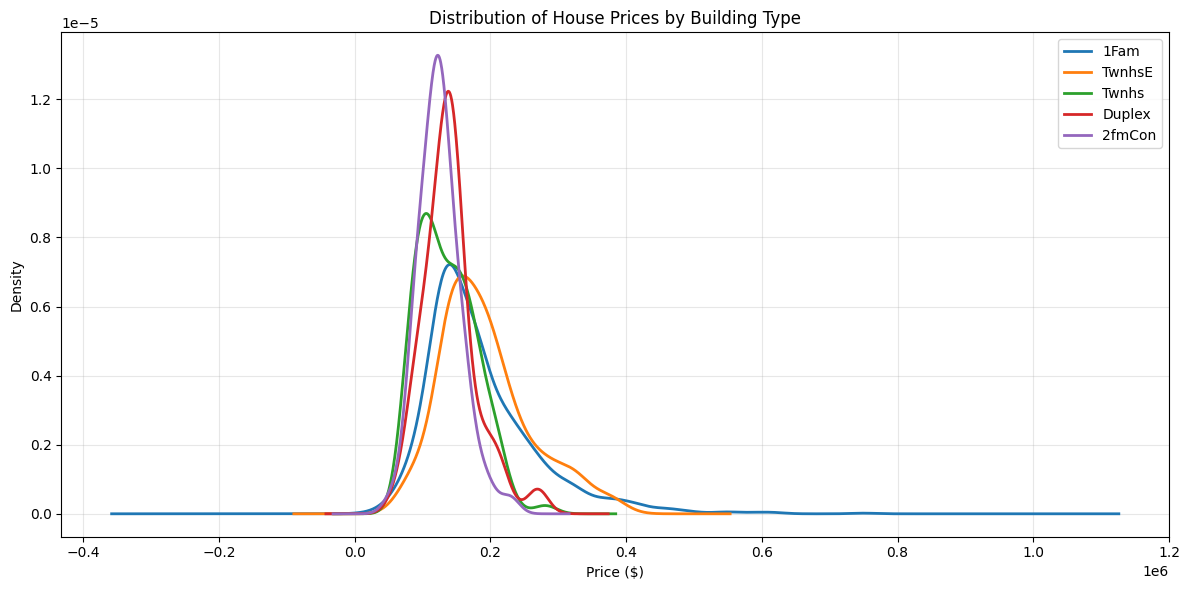


Mean prices by building type:
Bldg.Type
TwnhsE    192311.914163
1Fam      184812.041237
Duplex    139808.935780
Twnhs     135934.059406
2fmCon    125581.709677
Name: price, dtype: float64

Variance in prices by building type:
Bldg.Type
1Fam      6.859451e+09
TwnhsE    4.381346e+09
Twnhs     1.758874e+09
Duplex    1.560169e+09
2fmCon    9.665408e+08
Name: price, dtype: float64


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ames = pd.read_csv('data/ames_prices.csv', encoding='latin-1')

print(f"Dataset shape: {ames.shape}")
print(f"\nColumn names:")
print(ames.columns.tolist())
print(f"\nFirst few rows:")
print(ames.head())

print("\nOverall price statistics:")
print(ames['price'].describe())

plt.figure(figsize=(10, 6))
ames['price'].dropna().plot(kind='kde', linewidth=2)
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.title('Distribution of House Prices')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("Price statistics by building type:")
print("="*80)
print(ames.groupby('Bldg.Type')['price'].describe())

plt.figure(figsize=(12, 6))
for bldg_type in ames['Bldg.Type'].unique():
    if pd.notna(bldg_type):
        subset = ames[ames['Bldg.Type'] == bldg_type]['price'].dropna()
        if len(subset) > 0:
            subset.plot(kind='kde', linewidth=2, label=bldg_type)

plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.title('Distribution of House Prices by Building Type')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nMean prices by building type:")
mean_prices = ames.groupby('Bldg.Type')['price'].mean().sort_values(ascending=False)
print(mean_prices)

print("\nVariance in prices by building type:")
var_prices = ames.groupby('Bldg.Type')['price'].var().sort_values(ascending=False)
print(var_prices)

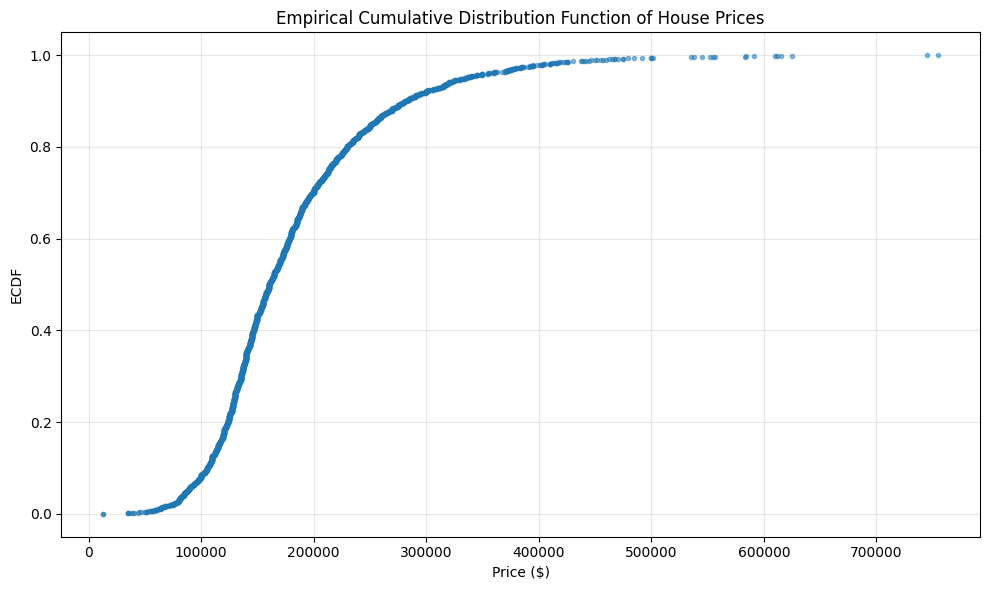

5-Number Summary:
Minimum: $12,789.00
Q1 (25th percentile): $129,500.00
Median (50th percentile): $160,000.00
Q3 (75th percentile): $213,500.00
Maximum: $755,000.00


In [44]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

prices_clean = ames['price'].dropna()

x, y = ecdf(prices_clean)

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='none', alpha=0.5)
plt.xlabel('Price ($)')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function of House Prices')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("5-Number Summary:")
print(f"Minimum: ${prices_clean.min():,.2f}")
print(f"Q1 (25th percentile): ${prices_clean.quantile(0.25):,.2f}")
print(f"Median (50th percentile): ${prices_clean.quantile(0.50):,.2f}")
print(f"Q3 (75th percentile): ${prices_clean.quantile(0.75):,.2f}")
print(f"Maximum: ${prices_clean.max():,.2f}")

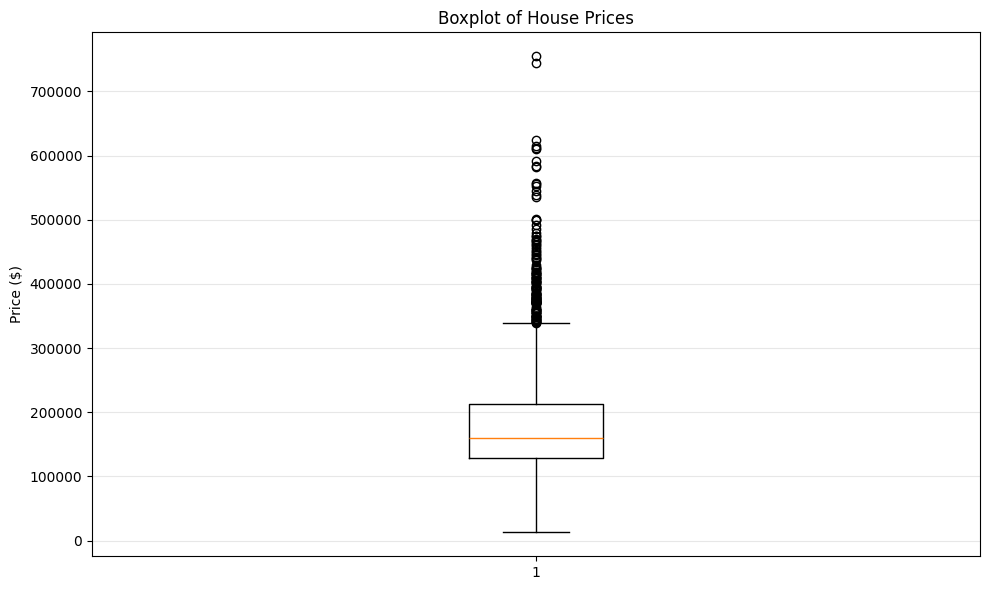


Number of outliers: 137
Percentage of outliers: 4.68%


<Figure size 1200x600 with 0 Axes>

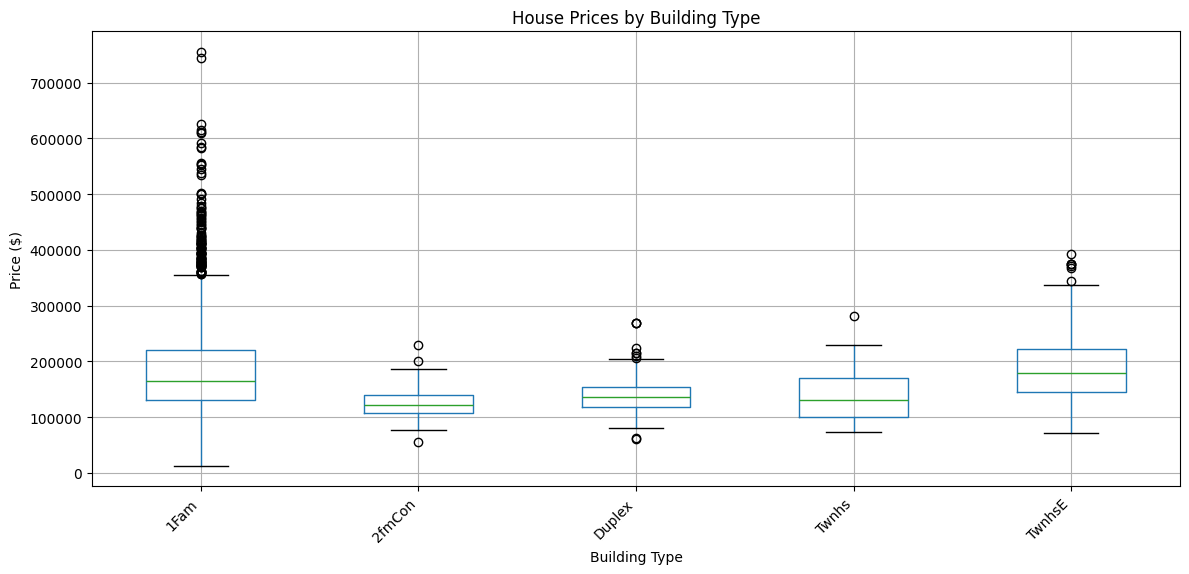

In [45]:
plt.figure(figsize=(10, 6))
plt.boxplot(prices_clean, vert=True)
plt.ylabel('Price ($)')
plt.title('Boxplot of House Prices')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Q1 = prices_clean.quantile(0.25)
Q3 = prices_clean.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = prices_clean[(prices_clean < lower_bound) | (prices_clean > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(prices_clean)) * 100:.2f}%")

plt.figure(figsize=(12, 6))
ames.boxplot(column='price', by='Bldg.Type', figsize=(12, 6))
plt.xlabel('Building Type')
plt.ylabel('Price ($)')
plt.title('House Prices by Building Type')
plt.suptitle('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Patterns observed:

Single-family homes have the highest median prices and largest variance, while duplexes and townhomes have lower median prices with less variance, and there are outliers in most building types particularly at the upper end of the price distribution.



In [46]:
Q1 = ames['price'].quantile(0.25)
Q3 = ames['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

ames['is_outlier'] = ((ames['price'] < lower_bound) | (ames['price'] > upper_bound)).astype(int)

print("Outlier dummy variable:")
print(ames['is_outlier'].value_counts())
print(f"\nProportion of outliers: {ames['is_outlier'].mean():.4f}")

Outlier dummy variable:
is_outlier
0    2793
1     137
Name: count, dtype: int64

Proportion of outliers: 0.0468


Original price statistics:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

Winsorized price statistics:
count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: price_winsorized, dtype: float64


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


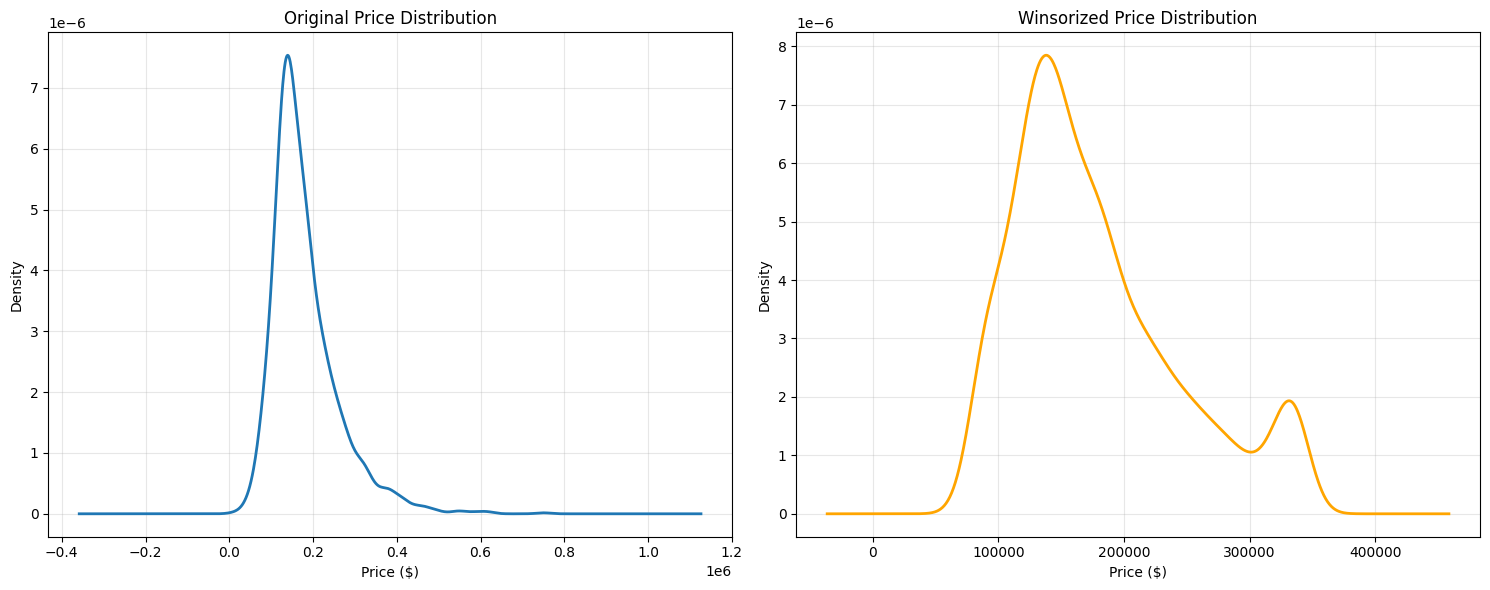


How results change:
Original mean: $180,796.06
Winsorized mean: $177,632.53

Original std: $79,886.69
Winsorized std: $66,195.45


In [47]:
from scipy.stats.mstats import winsorize

ames['price_winsorized'] = winsorize(ames['price'].dropna(), limits=[0.05, 0.05])

print("Original price statistics:")
print(ames['price'].describe())

print("\nWinsorized price statistics:")
print(pd.Series(ames['price_winsorized']).describe())

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ames['price'].dropna().plot(kind='kde', linewidth=2, ax=axes[0])
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Density')
axes[0].set_title('Original Price Distribution')
axes[0].grid(True, alpha=0.3)

pd.Series(ames['price_winsorized']).plot(kind='kde', linewidth=2, ax=axes[1], color='orange')
axes[1].set_xlabel('Price ($)')
axes[1].set_ylabel('Density')
axes[1].set_title('Winsorized Price Distribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nHow results change:")
print(f"Original mean: ${ames['price'].mean():,.2f}")
print(f"Winsorized mean: ${pd.Series(ames['price_winsorized']).mean():,.2f}")
print(f"\nOriginal std: ${ames['price'].std():,.2f}")
print(f"Winsorized std: ${pd.Series(ames['price_winsorized']).std():,.2f}")

After winsorizing, the extreme values are capped at the 5th and 95th percentiles, which reduces the standard deviation, brings the mean closer to the median, and makes the distribution less skewed with shorter tails.